In [6]:
#Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scipy.stats import pearsonr
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor


In [7]:
#Leer y crear una copia del dataset
data1 = pd.read_excel('Dataset_Banano.xlsx')
data = data1.copy()
data


,Año,Departamento,Producto,Area (ha),Produccion (ton),Rendimiento (ha/ton),Produccion Nacional (ton),Area Nacional (ha)
0,2007,ANTIOQUIA,BANANO,717.00,5805.00,8.10,2.61,2.93
1,2007,BOYACA,BANANO,482.00,3778.50,7.84,1.70,1.97
2,2007,CALDAS,BANANO,486.30,4754.36,9.78,2.14,1.99
3,2007,CAUCA,BANANO,812.00,4069.40,5.01,1.83,3.31
4,2007,CESAR,BANANO,58.00,700.00,12.07,0.31,0.24
...,...,...,...,...,...,...,...,...
292,2022,SAN ANDRES Y PROVIDENCIA,BANANO,2.16,24.90,11.53,0.01,0.00
293,2022,SANTANDER,BANANO,3113.00,24707.58,7.94,5.19,6.14
294,2022,TOLIMA,BANANO,5388.99,47901.10,8.89,10.05,10.64
295,2022,VALLE DEL CAUCA,BANANO,6852.34,89624.24,13.08,18.81,13.52


In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        297 non-null    int64  
 1   Departamento               297 non-null    object 
 2   Producto                   297 non-null    object 
 3   Area (ha)                  297 non-null    float64
 4   Produccion (ton)           297 non-null    float64
 5   Rendimiento (ha/ton)       297 non-null    float64
 6   Produccion Nacional (ton)  297 non-null    float64
 7   Area Nacional (ha)         297 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 18.7+ KB


In [9]:
data1.dtypes

,0
Año,int64
Departamento,object
Producto,object
Area (ha),float64
Produccion (ton),float64
Rendimiento (ha/ton),float64
Produccion Nacional (ton),float64
Area Nacional (ha),float64


In [10]:
data1.shape

(297, 8)

In [11]:
#Se crea un dataframe en la variable data con las columnas a trabajar y se reemplazan los valores 0.0 por NaN
data = data1[['Area (ha)', 'Produccion (ton)','Rendimiento (ha/ton)']]
data.replace(0.0, np.nan, inplace=True)
data

<ipython-input-11-a23bbbcd4808>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace(0.0, np.nan, inplace=True)


,Area (ha),Produccion (ton),Rendimiento (ha/ton)
0,717.00,5805.00,8.10
1,482.00,3778.50,7.84
2,486.30,4754.36,9.78
3,812.00,4069.40,5.01
4,58.00,700.00,12.07
...,...,...,...
292,2.16,24.90,11.53
293,3113.00,24707.58,7.94
294,5388.99,47901.10,8.89
295,6852.34,89624.24,13.08


In [12]:

#Separación variables y se eliminan los datos NaN
X = data[['Area (ha)','Produccion (ton)']].dropna()
y = data['Rendimiento (ha/ton)'].dropna()

In [13]:

#Pearson
correlation_prod, p_value_prod = pearsonr(X['Produccion (ton)'], y)
print(f'Coeficiente de correlación de Pearson entre Produccion (ton) y Rendimiento (ha/ton): {correlation_prod}')

correlation_area, p_value_area = pearsonr(X['Area (ha)'], y)
print(f'Coeficiente de correlación de Pearson entre Area (ha) y Rendimiento (ha/ton): {correlation_area}')


Coeficiente de correlación de Pearson entre Produccion (ton) y Rendimiento (ha/ton): 0.4100393660545989
Coeficiente de correlación de Pearson entre Area (ha) y Rendimiento (ha/ton): 0.2368008839016719


In [14]:

#Divido datos de entrenamiento
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Modelo Elegido: Random Forest

In [15]:
rf_regresion = RandomForestRegressor(n_estimators=100, random_state=42)
#se entrena el modelo
rf_regresion.fit(X_train, Y_train)
#se crea la prediccion
y_pred_rf = rf_regresion.predict(X_test)

In [16]:
#se crea el error medio cuadrado
mse = mean_squared_error(Y_test, y_pred_rf)
# se crea el R2 random forest
r2_rf = r2_score(Y_test, y_pred_rf)

# se imprime los resultados
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score: {r2_rf:.2f}')

Mean Squared Error: 1.38
R-squared Score: 0.91


In [18]:
# se realiza validacion cruzada
cvs_rf = cross_val_score(rf_regresion, X, y, cv=5, scoring='r2')
# se calcula la media de la validacion cruzada
cvs_rf_mean = cvs_rf.mean()
# se calcula la mediana de la validacion cruzada
cvs_rf_median = np.median(cvs_rf)



print(f'Validacion cruzada con R2 en Random Forest: {cvs_rf}')
print(f'Validacion cruzada con R2 con la media de Random Forest: {cvs_rf_mean}')
print(f'Validacion cruzada con R2 con la mediana de Random Forest: {cvs_rf_median}')


Validacion cruzada con R2 en Random Forest: [0.69382918 0.33223953 0.90786591 0.53667251 0.76639266]
Validacion cruzada con R2 con la media de Random Forest: 0.6473999563636775
Validacion cruzada con R2 con la mediana de Random Forest: 0.6938291787916455


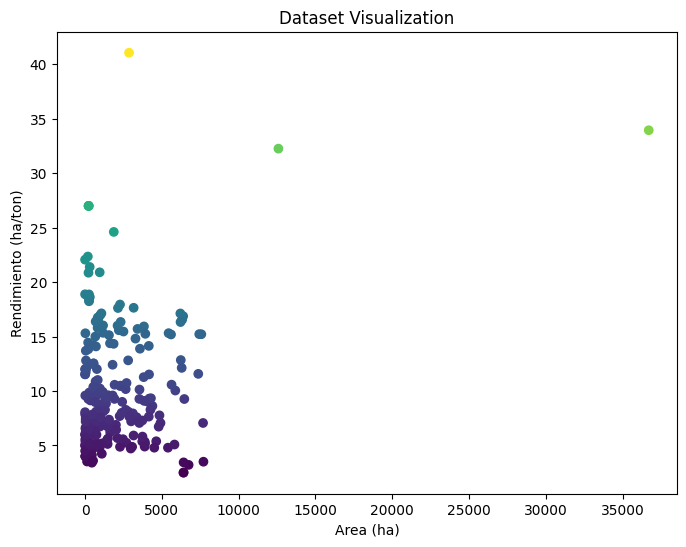

In [19]:
#se grafica
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_train['Area (ha)'], Y_train, c=Y_train.values.ravel(), cmap='viridis')

#linea de codigo donde se genera un vertice pero se descuadra todo el grafico
#ax.plot([x_test.min(), x_test.max()], [x_test.min(), x_test.max()], 'k--', lw=1)

ax.set_xlabel('Area (ha)')
ax.set_ylabel('Rendimiento (ha/ton)')
ax.set_title("Dataset Visualization")
plt.show()
